Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1.6
0.0


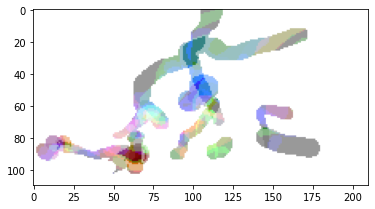

In [5]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

data_file_path = "/nesi/project/uoa03669/ewin313/TropicalCycloneAI/Data/run6/AllData_1718674910.7661033.hdf5"
with h5py.File(data_file_path, 'r+') as file:

    std = file["train_decade_std"]
    summed_std = np.sum(std[0][:,:,:4,:], axis=-1)
    plt.imshow(summed_std)
    print(np.max(summed_std))
    print(np.min(summed_std))
    '''
    plt.imshow(np.sum(genesis[0], axis=0))
    plt.show()
    #print(grids[0])
    print(grids.shape)
    plt.imshow(np.sum(grids[0,1,:,:,0,:], axis=-1))
    print(np.max(np.sum(grids[0,1,:,:,0,:], axis=-1)))
    #plt.imshow(np.median(np.sum(np.sum(grids[0], axis=-2)[:,:,:,4:6], axis=-1), axis=0))
    plt.show()
    plt.imshow(np.mean(np.sum(np.sum(grids[0], axis=-2)[:,:,:,4:6], axis=-1), axis=0))
    plt.show()
    plt.imshow(np.quantile(np.sum(np.sum(grids[0], axis=-2)[:,:,:,4:6], axis=-1), 0.7, axis=0))
    plt.show()
    plt.imshow(np.max(np.sum(np.sum(grids[0], axis=-2)[:,:,:,4:6], axis=-1), axis=0))
    plt.show()
    print(np.max(np.mean(np.sum(np.sum(grids[0], axis=-2)[:,:,:,4:6], axis=-1), axis=0)))
    print(np.unravel_index(np.argmax(grids[0,:,:]), grids[0].shape))
    print(np.max(np.sum(grids[0], axis=-2)[6,:,:,5]))
    #print(np.count_nonzero(grids[0,:,:,:,:,0]))
    '''



In [ ]:
from psutil import Process
import numpy as np
import random
def _get_random_year_combination(num_years, size):
    sample = set()
    while len(sample) < size:
        # Choose one random item from items
        elem = random.randint(0, num_years - 1)
        # Using a set elminates duplicates easily
        sample.add(elem)
    return tuple(sample)


def get_random_year_combinations(num_combinations, num_years, size):
    samples = set()
    while len(samples) < num_combinations:
        comb = _get_random_year_combination(num_years, size)
        samples.add(comb)

    return tuple(samples)

def get_grid_sum_samples(yearly_grids, n_years_to_sum, n_years_to_sum_cat_4_5, n_samples, total_years):
    print("getting grid sums")
    print("1", Process().memory_info().rss)
    sums = []
    yearly_grids = np.array(yearly_grids)
    year_indices = get_random_year_combinations(n_samples, total_years, n_years_to_sum)
    year_indices_cat_4_5 = get_random_year_combinations(n_samples, total_years, n_years_to_sum_cat_4_5)
    
    for i in range(n_samples):
        print(len(sums))
        sampled_sum = np.zeros(yearly_grids[0].shape)
        print(sampled_sum[:,:,:,:4].shape)
        print(yearly_grids[list(year_indices[i]), :, :, :, :4].shape)
        print(Process().memory_info().rss)
        sampled_sum[:,:,:,:4] = np.sum(yearly_grids[list(year_indices[i]), :, :, :, :4].copy(), axis=0)
        print(Process().memory_info().rss)
        sampled_sum[:, :, :, 4:] = np.sum(yearly_grids[list(year_indices_cat_4_5[i]), :, :, :, 4:].copy(), axis=0)
        
        sums.append(sampled_sum)
        print(Process().memory_info().rss)
    
    sums = np.array(sums)  
    print(Process().memory_info().rss)
    return sums

def main():
    yearly_grids = np.ones((1000, 110, 55, 6, 6))
    grid_sums = get_grid_sum_samples(yearly_grids, 5, 5, 10, 1000)
    Process().memory_info().rss
    del yearly_grids
    Process().memory_info().rss

    return grid_sums

grid_sums = []
for i in range(5):
    grid_sums.append(main())


getting grid sums
1 1828110336
0
(110, 55, 6, 4)
(5, 110, 55, 6, 4)
3577507840
3583545344
3583709184
1
(110, 55, 6, 4)
(5, 110, 55, 6, 4)
3583709184
3585454080
3585454080
2
(110, 55, 6, 4)
(5, 110, 55, 6, 4)
3585454080
3587076096
3587076096
3
(110, 55, 6, 4)
(5, 110, 55, 6, 4)
3587076096
3588956160
3588956160
4
(110, 55, 6, 4)
(5, 110, 55, 6, 4)
3588956160
3590578176
3590578176
5
(110, 55, 6, 4)
(5, 110, 55, 6, 4)
3590578176
3592200192
3592200192
6
(110, 55, 6, 4)
(5, 110, 55, 6, 4)
3592200192
3594092544
3594092544
7
(110, 55, 6, 4)
(5, 110, 55, 6, 4)
3594092544
3595714560
3595714560
8
(110, 55, 6, 4)
(5, 110, 55, 6, 4)
3595714560
3597606912
3597606912
9
(110, 55, 6, 4)
(5, 110, 55, 6, 4)
3597606912
3599228928
3599228928
3616784384
getting grid sums
1 1847275520
